## HANDWRITEN DIGIT PREDICTIONS using KNN(K-Nearest Neighbours)


In [ ]:
import pandas as pd

mnist_train = pd.read_csv('../input/digit-recognizer/train.csv')
mnist_test = pd.read_csv('../input/digit-recognizer/test.csv')

In [ ]:
X_train, y_train = mnist_train.drop("label", axis=1).values, mnist_train["label"].values
X_test = mnist_test.values
X_train.shape

(42000, 784)

In [ ]:
y_train.shape

(42000,)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

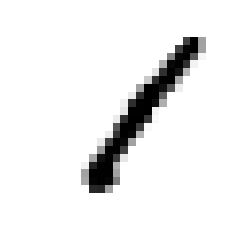

In [ ]:
some_digit = X_train[0]
plot_digit(some_digit)

In [ ]:
import numpy as np

y_train = y_train.astype(np.uint8)

## Data Augmentation

In [7]:
from scipy.ndimage.interpolation import shift

In [8]:
def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

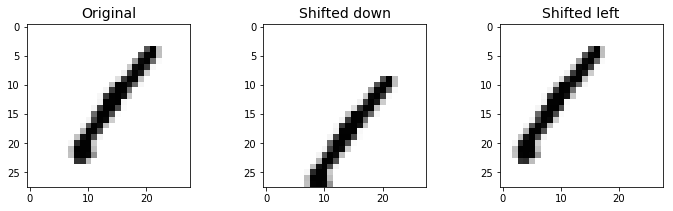

In [9]:
shifted_image_down = shift_image(some_digit, 0, 5)
shifted_image_left = shift_image(some_digit, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(some_digit.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [10]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [11]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

## kNN classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=4)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [13]:
y_pred = knn_clf.predict(X_test)

In [14]:
submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

submission["Label"] = y_pred
submission.to_csv('submission.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
